# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '230905'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major.y=element_line()))

In [4]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Age+Sex" = colors_dict$pastel$red$mid,
    "Retina" = colors_dict$pastel$red$mid,
    "Age+Sex+Retina" = colors_dict$pastel$red$mid,
    'MultiTaskSurvivalTraining_None_InceptionResnetV2+MLP_Identity' = colors_dict$pastel$red$mid
    #"Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [5]:
endpoints_md = fread(glue("{experiment_path}/endpoints.csv"), colClasses=c("phecode"="character")) %>% filter(n>=100) %>% as_tibble()
#endpoints = sort(endpoints_md$endpoint)

In [6]:
endpoints_md

V1,endpoint,eligable,n,freq,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
0,OMOP_4306655,61256,3474,0.056712812,4306655,All-Cause Death,Death,Both,NA,NA,NA
1,phecode_002,61048,516,0.008452365,002,Staphylococcus,ID,Both,0,2,0
2,phecode_002-1,61109,342,0.005596557,002.1,Staphylococcus aureus,ID,Both,0,2,1
3,phecode_003,61138,691,0.011302300,003,Escherichia coli,ID,Both,0,3,1
4,phecode_004,61092,353,0.005778171,004,Streptococcus,ID,Both,0,4,0
5,phecode_009,61210,227,0.003708544,009,Pseudomonas,ID,Both,0,9,1
6,phecode_011,61236,156,0.002547521,011,Klebsiella,ID,Both,0,11,1
7,phecode_015,61228,129,0.002106879,015,Clostridium,ID,Both,0,15,0
8,phecode_015-2,61230,124,0.002025151,015.2,Clostridium difficile,ID,Both,0,15,1


In [7]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)
#endpoint_defs

In [8]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint

In [9]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401", #Hypertension"
    "phecode_404", # Ischemic heart disease
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure
    
    "phecode_059-1", # COVID 19
    
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
    
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    
    #"phecode_374-3", # Retinal vascular changes and occlusions
###  "phecode_374-42", # Diabetic retinopathy ### OBSOLETE W/O COVID DATA :( 
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    #"phecode_388" # Blindness and low vision 
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_440-3", # Pulmonary embolism
    
    "phecode_583", # Chronic kidney disease
    "phecode_542", # Chronic liver disease and sequelae
    
    "OMOP_4306655" # All-Cause Death
    
    #"phecode_468-1",	#Viral pneumonia
    
    #"phecode_460-2",	#Acute lower respiratory infection
    #"phecode_665", # Psoriasis
    #"phecode_121", # Leukemia
    #"phecode_705-1" # Rheumatoid arthritis

)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [10]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"COPD",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
               phecode_string == "Malignant neoplasm of the thoracic and respiratory organs"~"Thoracic and respiratory cancer",
               phecode_string == "Malignant neoplasm of the digestive organs"~"GI cancer",
               phecode_string == "Malignant neoplasm of the skin"~"Skin cancer",
               phecode_string == "Dementias and cerebral degeneration"~"Dementias",
               phecode_string == "Chronic liver disease and sequelae"~"Chronic liver disease",
               
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

## Load data

# Load Benchmarks

In [11]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '230905'

In [12]:
#name = glue("benchmark_cindex_agesexcoxph_{today}")
name = glue("benchmarks_cindex_{today}")
crop_ratio = "0.66" # 0.3, 0.5, 0.8
benchmark_endpoints = arrow::read_feather(glue("/sc-projects/sc-proj-ukb-cvd/results/projects/22_retina_phewas/data/{today}/{name}.feather")) %>% left_join(endpoint_defs) 
#benchmark_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather")) %>% left_join(endpoint_defs) 

Joining, by = "endpoint"



In [13]:
benchmark_endpoints

endpoint,score,model,iteration,time,cindex,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,name
<glue>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
OMOP_4306655,Age+Sex,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7047410,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.6956522,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7121170,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,SCORE2,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7223277,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,SCORE2+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7247350,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7218691,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7237858,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,QRISK3,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7339623,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,QRISK3+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7336560,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death


In [14]:
benchmark_endpoints = benchmark_endpoints %>%
    filter(model == glue("ImageTraining_[]_ConvNeXt_MLPHead_predictions"))

In [15]:
benchmark_endpoints %>% group_by(endpoint, score)  %>% summarise(cindex=mean(cindex)) %>% group_by(score) %>% summarise(mean(cindex)) %>% arrange(`mean(cindex)`)

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



score,mean(cindex)
<chr>,<dbl>
Retina,0.6086850
Age+Sex,0.6177822
Age+Sex+Retina,0.6312260
SCORE2,0.6390705
ASCVD,0.6418156
SCORE2+Retina,0.6448656
ASCVD+Retina,0.6452609
QRISK3,0.6521761
QRISK3+Retina,0.6534546


In [16]:
endpoints_sorted = (benchmark_endpoints %>% 
    filter(score == "Age+Sex+Retina") %>% 
    group_by(endpoint, score) %>% 
    summarise(cindex=mean(cindex, na.rm=TRUE)) %>% 
    arrange(cindex) %>% ungroup())$endpoint

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



In [17]:
categories_sorted = (endpoint_defs %>% distinct(phecode_category))$phecode_category

## delta c-idx with positive values (negative set to 0)

## delta c-idx with negative values

`summarise()` has grouped output by 'endpoint', 'phecode_string'. You can override using the `.groups` argument.



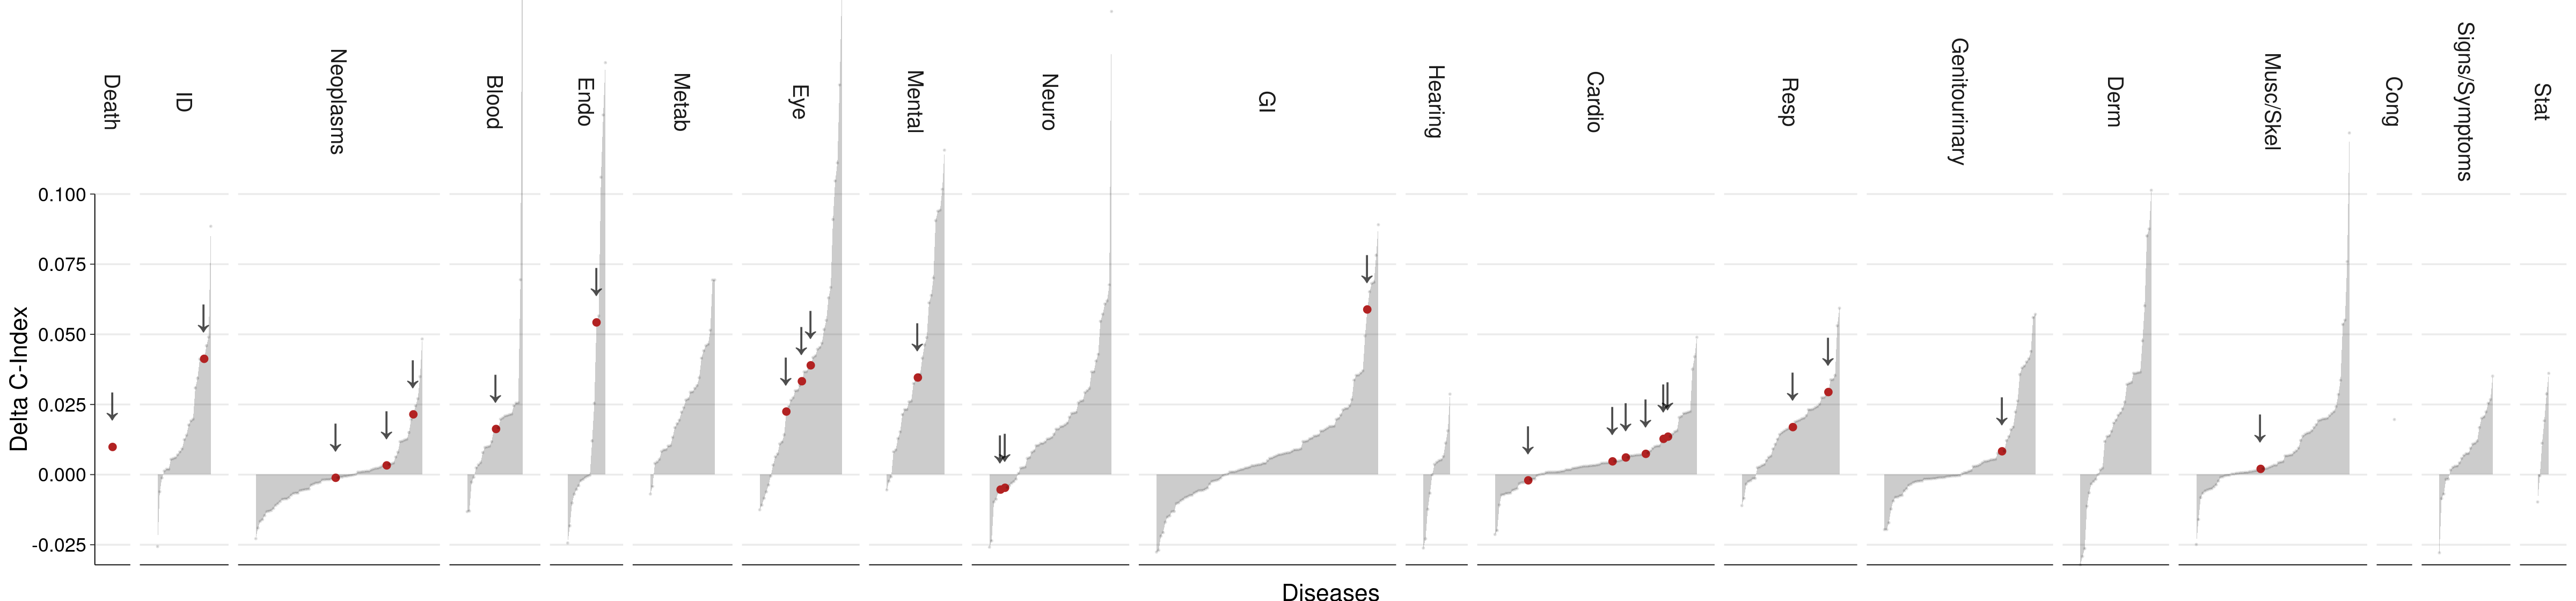

In [18]:
plot_width = 15; plot_height=3.5; plot_res = 320
#plot_width = 30; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

temp_pos = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>% filter(endpoint %in% endpoints_md$endpoint)

temp_pos = temp_pos %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    summarise(delta = median(delta)) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted))

endpoint_order = (temp_pos %>% arrange(delta))$endpoint

temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number())

fig3a = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=delta), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=delta, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=delta+0.015, label="↓"), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y=glue("Delta C-Index"))+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(NA, 0.1), clip = "off")+
    #coord_cartesian(ylim=c(-0.1, 0.1), clip = "on")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=8))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(
        #axis.title.x=element_blank(),
        axis.title.x = element_text(vjust=-2, hjust=.5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major=element_blank(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") +
    labs(x='Diseases')
    
fig3a

In [19]:
plot_name = "Figure3a_UKB_Discrimination_PhenomeWide"
fig3a %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device=cairo_pdf, width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig3a %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
temp_pos %>% write_csv(glue("outputs/UKB_Figure3a.csv"))

## selected endpoints

In [20]:
plot_width = 8.75; plot_height=3; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Retina", "Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    #mutate(delta_int = `Age+Sex+Retina`-`Age+Sex+Retina`) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    filter(endpoint %in% endpoint_selection)
    #%>%
    #summarise(cindex = mean(cindex)) 
temp %>% head()

endpoint,model,iteration,time,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,name,Age+Sex,Retina,Age+Sex+Retina,id,delta,pos,highlight
<fct>,<chr>,<int>,<int>,<chr>,<chr>,<fct>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
OMOP_4306655,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death,0.7047410,0.6956522,0.7121170,1,0.007375983,pos,YES
phecode_059-1,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,059.1,COVID-19*,ID,Both,1,059,1,COVID-19*,0.6303806,0.7056046,0.7362943,15,0.105913766,pos,YES
phecode_101,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,101,Malignant neoplasm of the digestive organs,Neoplasms,Both,0,101,0,GI cancer,0.6799521,0.6519980,0.6763976,28,-0.003554489,neg,YES
phecode_102,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,102,Malignant neoplasm of the thoracic and respiratory organs,Neoplasms,Both,0,102,0,Thoracic and respiratory cancer,0.6689824,0.6779850,0.6813958,36,0.012413393,pos,YES
phecode_103,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,103,Malignant neoplasm of the skin,Neoplasms,Both,0,103,0,Skin cancer,0.6608053,0.6358427,0.6643176,38,0.003512356,pos,YES
phecode_164,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,164,Anemia,Blood,Both,0,164,0,Anemia,0.6038562,0.6208970,0.6205418,107,0.016685585,pos,YES


In [21]:
library(ggdist)

Warning message:
“package ‘ggdist’ was built under R version 4.0.5”


In [22]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [23]:
endpoint_selection 

[1] "phecode_202"    "phecode_401"    "phecode_404"    "phecode_404-1" 
 [5] "phecode_431-11" "phecode_424"    "phecode_059-1"  "phecode_468"   
 [9] "phecode_474"    "phecode_286-2"  "phecode_324-11" "phecode_328"   
[13] "phecode_164"    "phecode_726-1"  "phecode_371"    "phecode_374-5" 
[17] "phecode_375-1"  "phecode_103"    "phecode_101"    "phecode_102"   
[21] "phecode_440-3"  "phecode_583"    "phecode_542"    "OMOP_4306655"

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



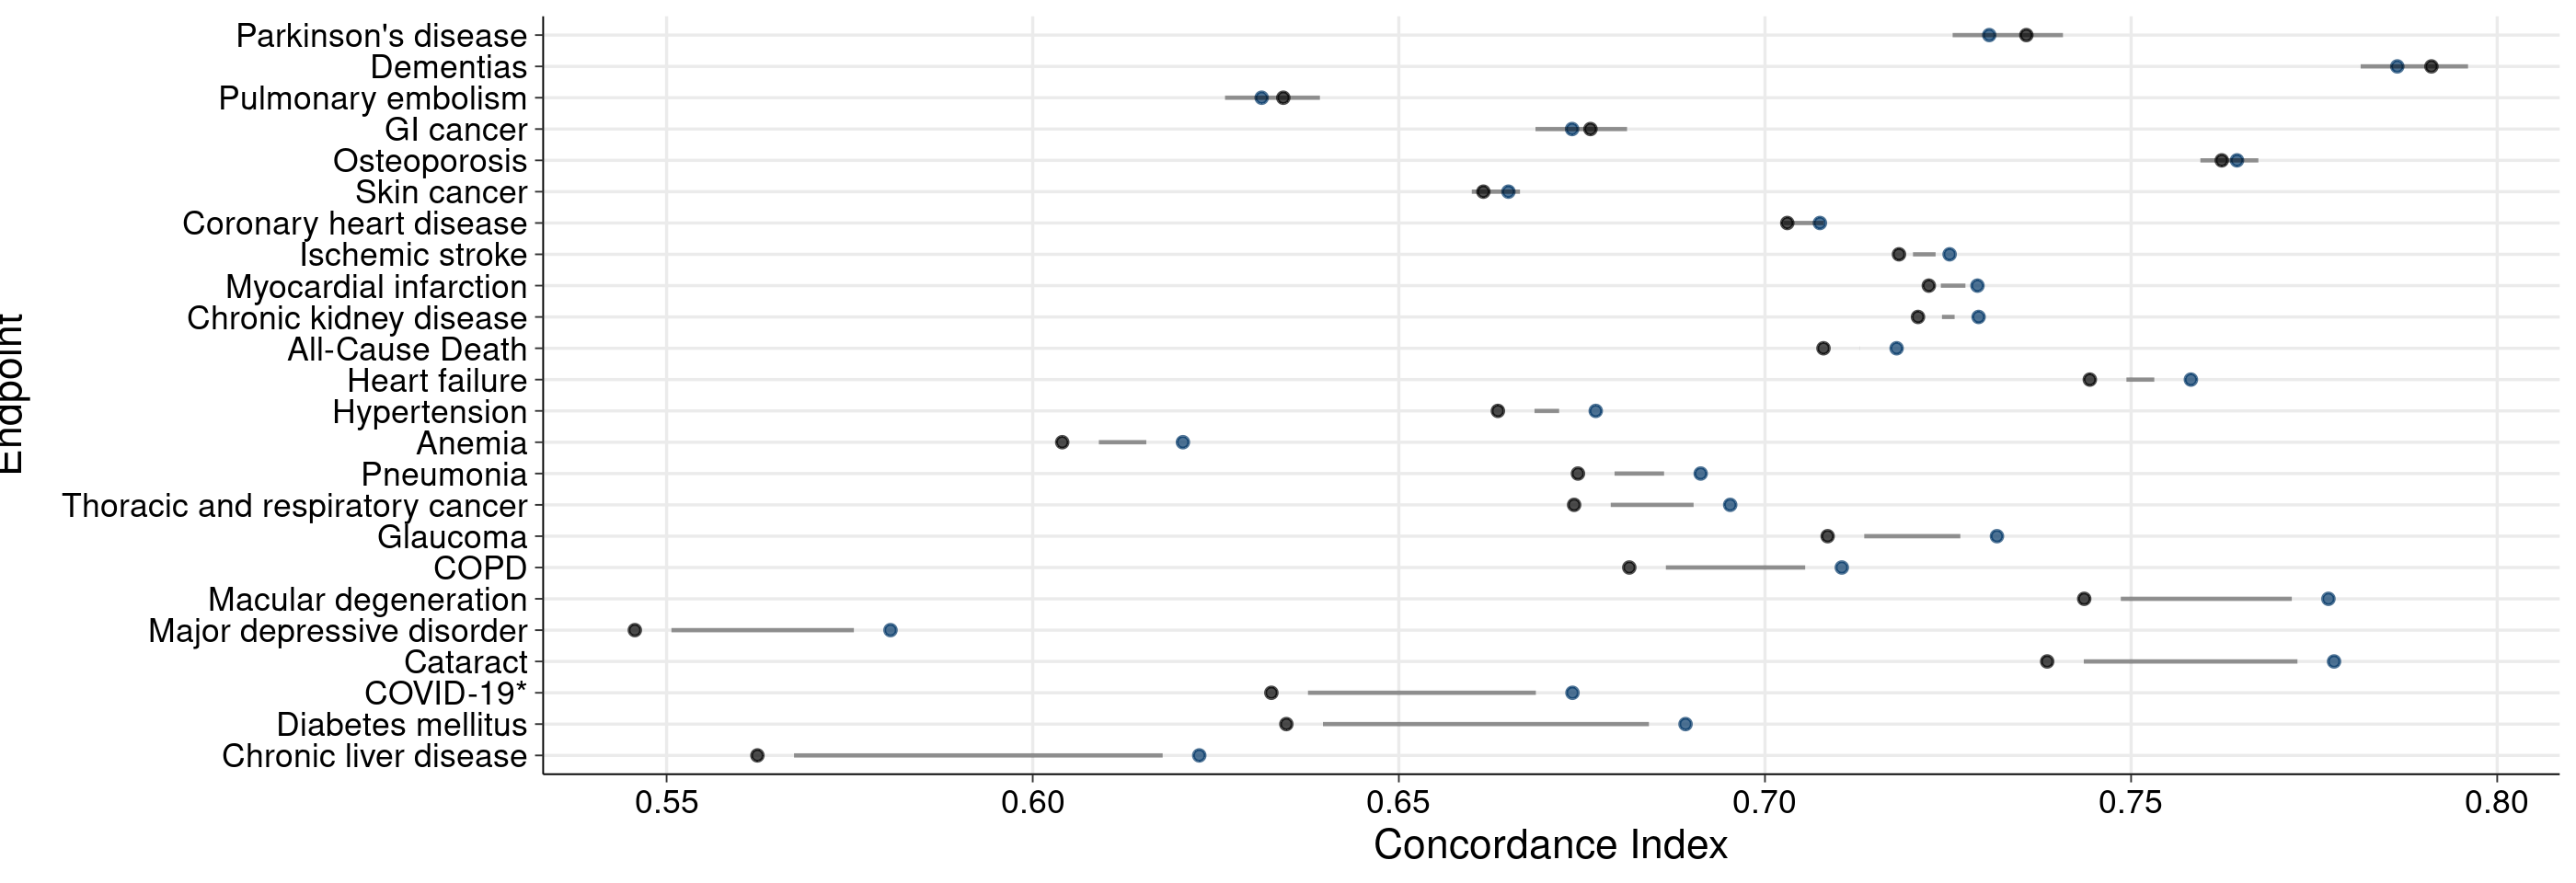

In [24]:
# temp %>% filter(endpoint %in% endpoint_selection) %>%
#     group_by(endpoint) %>%
#     summarise(m_asm=median(`Age+Sex+Retina`), m_as=median(`Age+Sex`)) %>%
#     mutate(endpoint, recode_factor(endpoint, !!!endpoint_map))

abs = ggplot(temp %>% 
             filter(endpoint %in% endpoint_selection) %>%
             group_by(endpoint) %>%
             summarise(m_asm=median(`Age+Sex+Retina`), m_as=median(`Age+Sex`))
                ) + 
    #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
    labs(y="Concordance Index", x="Endpoint")+
    #stat_pointinterval(aes(x=fct_rev(endpoint), y=`Age+Sex`), size=1, color="black", alpha=0.3)+
    #stat_pointinterval(aes(x=fct_rev(endpoint), y=`Age+Sex+Retina`), size=1, color="#023768", alpha=0.5)+
    geom_point(aes(x=fct_rev(endpoint), y=m_as), size=1, color="black", alpha=0.7)+
    geom_point(aes(x=fct_rev(endpoint), y=m_asm), size=1, color="#023768", alpha=0.7)+
    geom_segment(aes(x=endpoint, xend=endpoint, y=m_as+0.005, yend=m_asm-0.005), alpha=0.4)+#+
    #scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    #scale_alpha_manual(values=c("NO"=0.3, "YES"=0.7))+
    #scale_size_manual(values=c("NO"=0.1, "YES"=0.5))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    coord_cartesian(ylim=c(-0.6, 18), clip = "off")+
    scale_x_discrete(labels=endpoint_map) +
    #scale_x_discrete(labels=function(endpoint_map) formatC(endpoint_map, width=5)) +
    #scale_y_continuous(expand=c(0, 0))+
    #theme(axis.title.x=element_blank(),
     #   axis.text.x=element_blank(),
      #  axis.ticks.x=element_blank(),
    coord_flip()+
    theme(
        strip.text = element_text(angle=270),
        axis.title.y = element_text(vjust=4, hjust=.5)
    ) +
    theme(legend.position="none")
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
abs 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



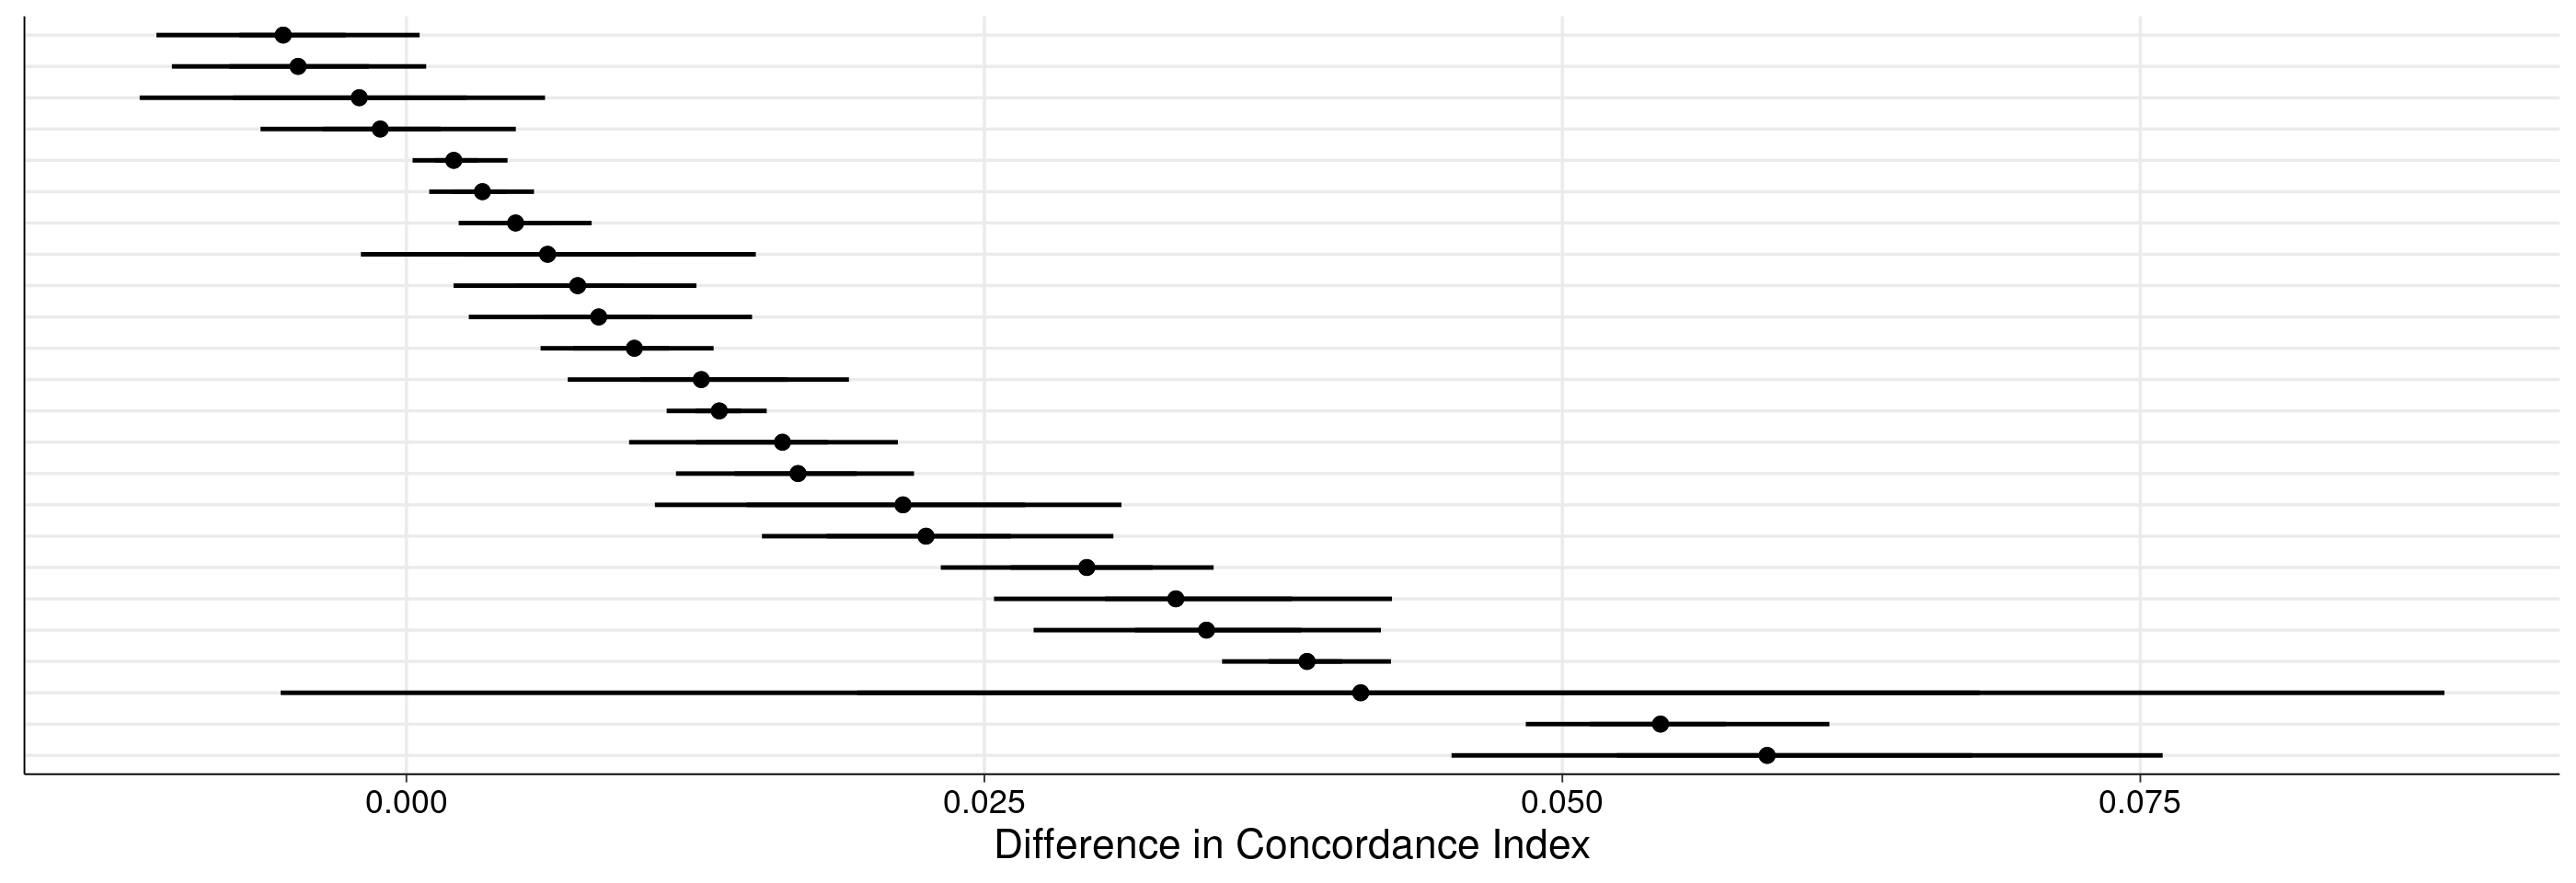

In [25]:
rel = ggplot(temp) + 
    #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
    labs(y="Difference in Concordance Index")+
    stat_pointinterval(aes(x=fct_rev(endpoint), y=delta), size=0.5)+
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    #scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    #scale_alpha_manual(values=c("NO"=0.3, "YES"=0.7))+
    #scale_size_manual(values=c("NO"=0.1, "YES"=0.5))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    coord_cartesian(ylim=c(-0.6, 18), clip = "off")+
    #scale_y_continuous(expand=c(0, 0))+
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
       axis.ticks.y=element_blank()) + 
    coord_flip()+
     theme(strip.text = element_text(angle=270)) + 
    theme(legend.position="none")
rel    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1) 

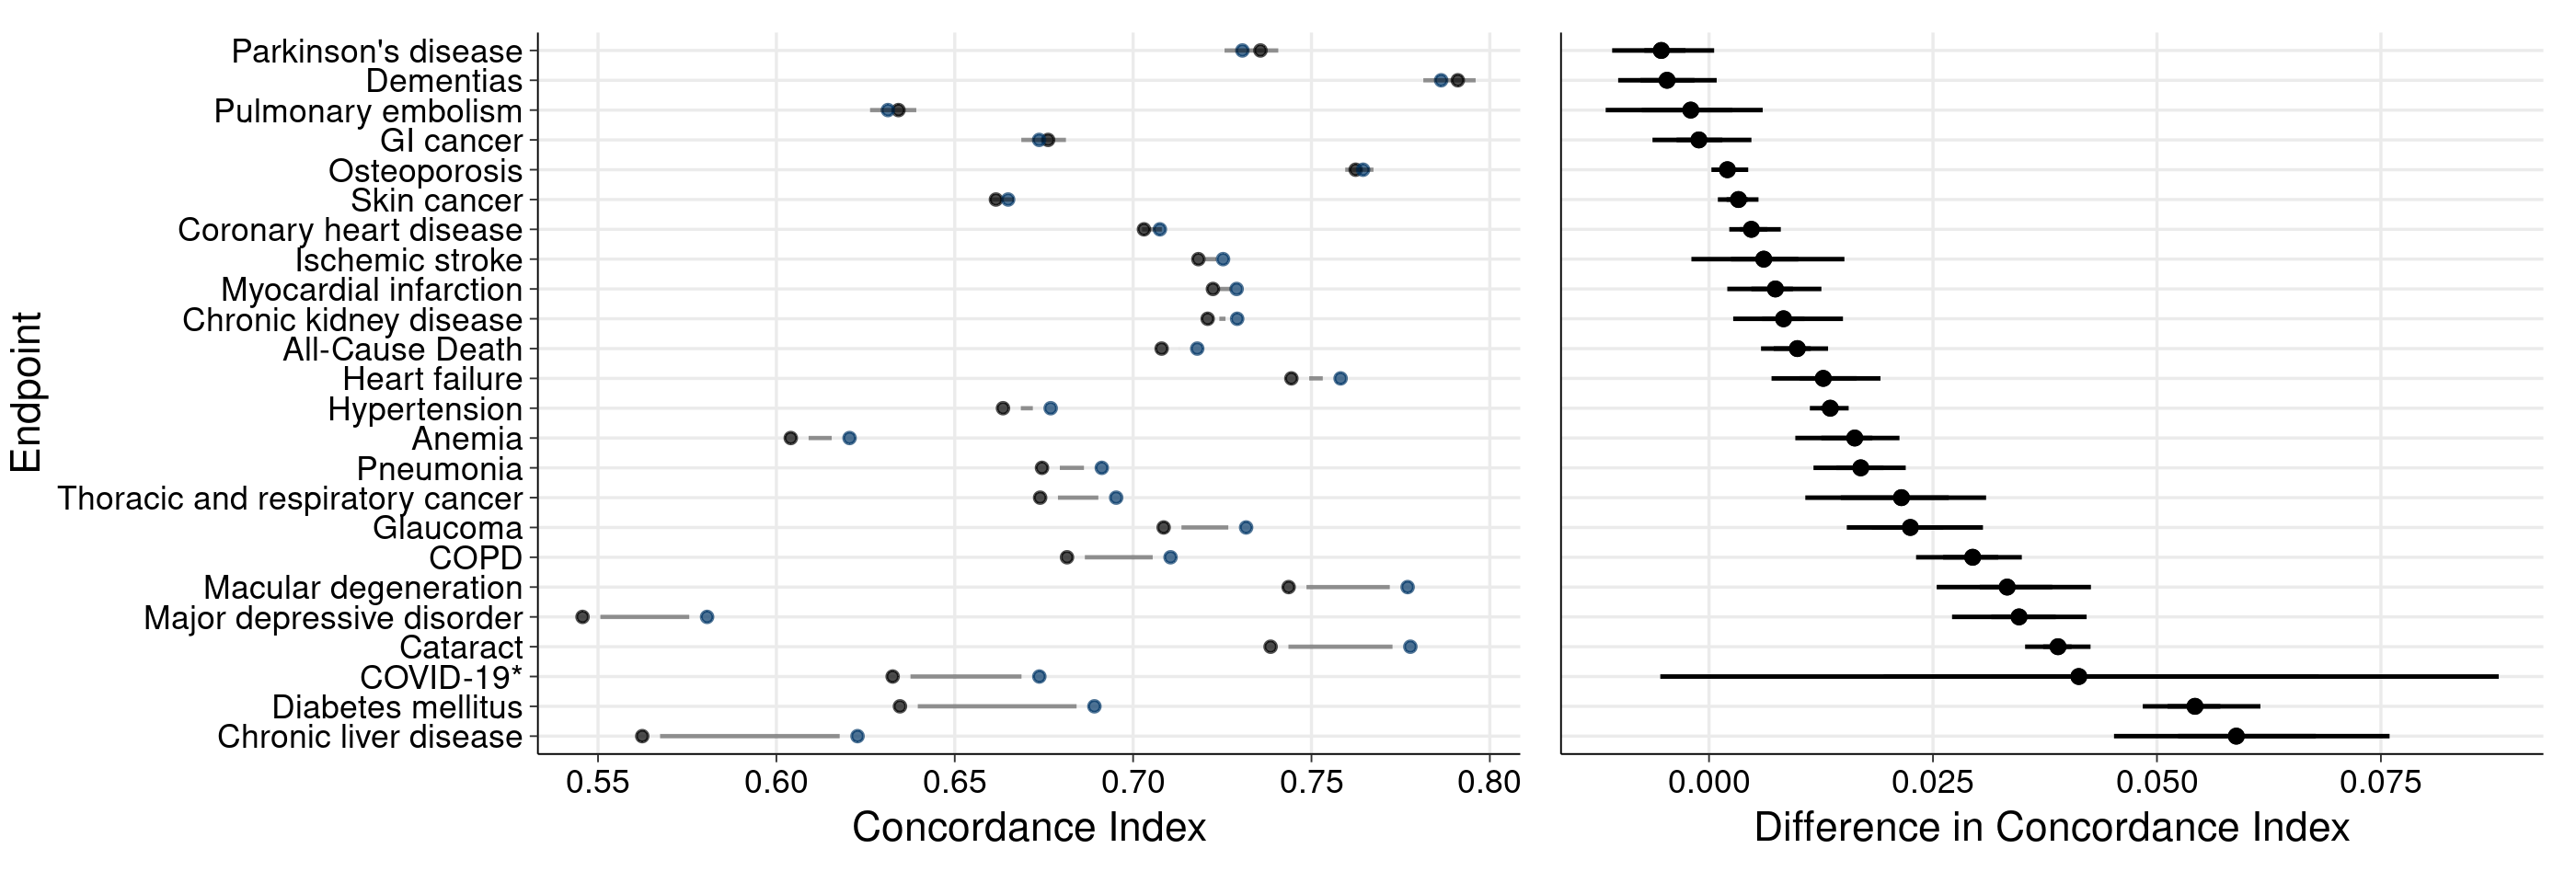

In [26]:
plot_width = 8.75; plot_height=3; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
fig3b = abs +
theme(
        strip.text = element_text(angle=270),
#        axis.title.y = element_text(vjust=5, hjust=0.6)
    )|rel
fig3b

In [27]:
plot_name = "Figure3b_Discrimination_CIdx_Selected"
fig3b %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig3b %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

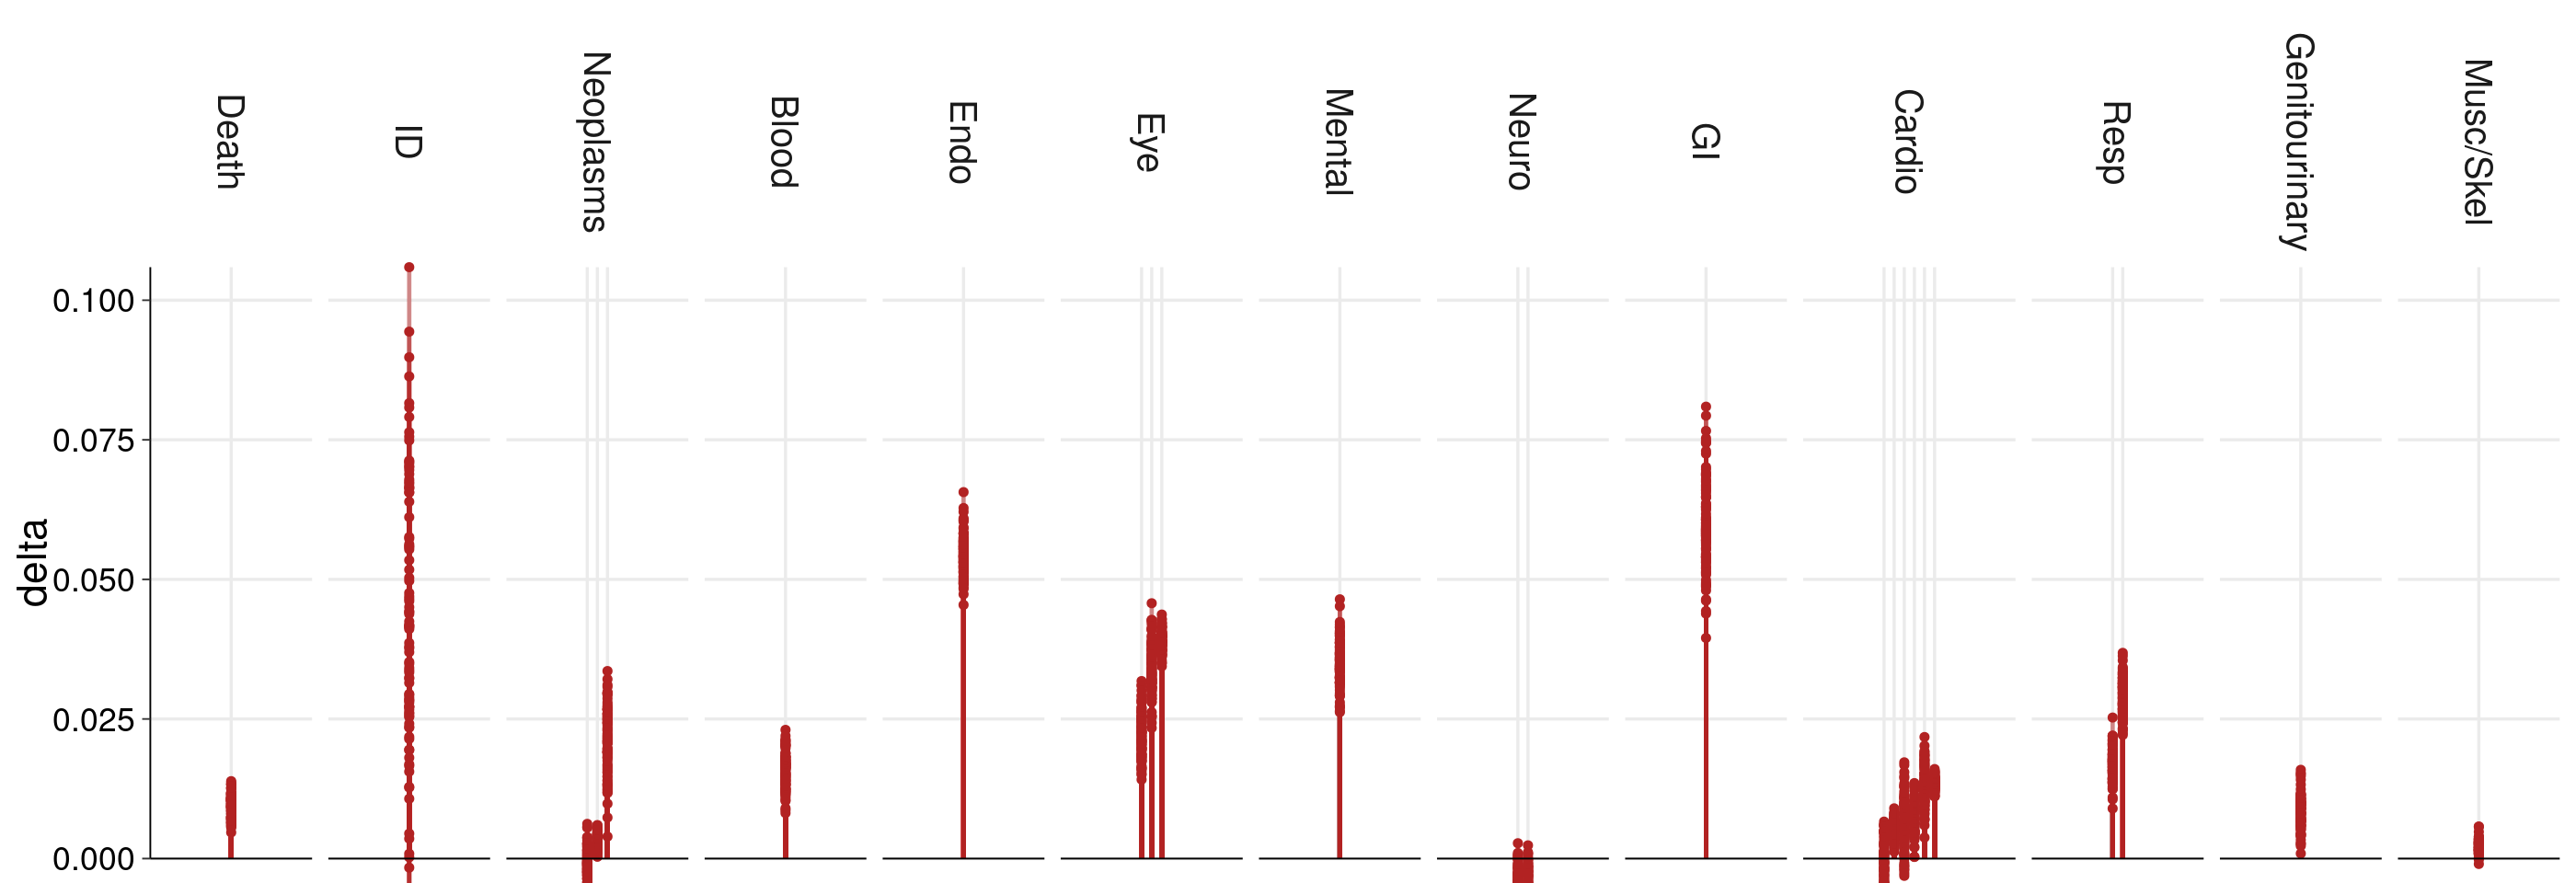

In [28]:
ggplot(temp) + 
    geom_point(aes(x=endpoint, y=delta, color=highlight), size=0.5) +
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    #scale_alpha_manual(values=c("NO"=0.3, "YES"=0.7))+
    scale_size_manual(values=c("NO"=0.1, "YES"=0.5))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    coord_cartesian(ylim=c(0, NA), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=8))+
    facet_grid(~phecode_category, scale="free_x", space="free_x")+#, switch=TRUE)+
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
     strip.text = element_text(angle=270)) + 
    theme(legend.position="none")
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+MedicalHistory`), fill="red", alpha=0.2)
#geom_violin(size=0.1) 

# CALCULATE THE FREQ of significant!

In [29]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

In [30]:
options(repr.matrix.max.rows=1500, repr.matrix.max.cols=200)

In [31]:
library(ggdist)

In [32]:
table_2_pre = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    #median_qi(delta)
    median_qi(delta) %>% filter(endpoint %in% endpoints_md$endpoint)
    #mutate(posdelta = case_when(delta>=0 ~ "pos", delta < 0 ~"neg"))
#table_2_pre %>% head()
print(nrow(table_2_pre))

cat("nrows with positive lower q of delta:", nrow(table_2_pre %>% filter(.lower > 0)))
cat("\nnrows with negative lower q of delta:", nrow(table_2_pre %>% filter(.lower <= 0)))
cat("\nnrows with positive delta:", nrow(table_2_pre %>% filter(delta > 0)))
cat("\nnrows with negative delta:", nrow(table_2_pre %>% filter(delta <= 0)))

[1] 752
nrows with positive lower q of delta: 273
nrows with negative lower q of delta: 479
nrows with positive delta: 534
nrows with negative delta: 218

In [33]:
table_2_significant = table_2_pre %>%
    filter(delta > 0) %>%
    filter(.lower > 0) %>%
    arrange(endpoint)

In [34]:
options(repr.matrix.max.rows=1500, repr.matrix.max.cols=200)


table_2_significant %>% arrange(desc(delta))

endpoint,phecode_string,phecode_category,delta,.lower,.upper,.width,.point,.interval
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
phecode_165,Hemoglobinopathies,Blood,0.233657558,1.835558e-01,0.308467042,0.95,median,qi
phecode_387-2,Myopia,Eye,0.172289178,1.526899e-01,0.194642060,0.95,median,qi
phecode_337-8,Polyneuropathy in diseases classified elsewhere,Neuro,0.165067590,1.300286e-01,0.210548439,0.95,median,qi
phecode_202-1,Type 1 diabetes,Endo,0.146821851,1.192289e-01,0.174351839,0.95,median,qi
phecode_374-4,Retinal disorders in diseases classified elsewhere,Eye,0.138902718,1.125706e-01,0.158983422,0.95,median,qi
phecode_205,Hypoglycemia,Endo,0.128187581,1.031514e-01,0.157851117,0.95,median,qi
phecode_716-2,Degenerative disc disease,Musc/Skel,0.121777520,9.233856e-02,0.168153388,0.95,median,qi
phecode_283-4,Patient's noncompliance with medical treatment and regimen,Mental,0.115641650,8.645409e-02,0.156522474,0.95,median,qi
phecode_388,Blindness and low vision,Eye,0.111102395,6.740589e-02,0.144331788,0.95,median,qi


In [35]:
table_2_significant %>% group_by(phecode_category) %>% count() #%>% mutate(freq=n/ 283)

phecode_category,n
<chr>,<int>
Blood,11
Cardio,24
Death,1
Derm,16
Endo,5
Eye,25
Genitourinary,11
GI,30
Hearing,1


In [36]:
table_2_pre %>%
    filter(delta > 0) %>%
    filter(.lower > 0) %>%
    arrange(endpoint) %>% 
    write_csv(glue("outputs/UKB_SupplTable2_SignificantEndpoints_CropRatio-{crop_ratio}.csv"))

In [37]:
endpoints_by_category_count = endpoints_md %>% group_by(phecode_category) %>% count(name='num_phecodes_in_category')
significant_endpoints_by_category = table_2_significant %>% group_by(phecode_category) %>% count(name='num_phecodes_significant')
st5 = endpoints_by_category_count %>% left_join(significant_endpoints_by_category) %>% mutate(percent_significant=num_phecodes_significant/num_phecodes_in_category)
st5 = st5 %>% arrange(desc(percent_significant))
st5

Joining, by = "phecode_category"



phecode_category,num_phecodes_in_category,num_phecodes_significant,percent_significant
<chr>,<int>,<int>,<dbl>
Death,1,1,1.00000000
Metab,30,24,0.80000000
Mental,27,20,0.74074074
Eye,38,25,0.65789474
Signs/Symptoms,25,15,0.60000000
Resp,45,23,0.51111111
Stat,6,3,0.50000000
Derm,33,16,0.48484848
Blood,26,11,0.42307692


In [38]:
st5 %>% 
    write_csv(glue("outputs/UKB_SupplTable5_SignificantPheCodesPerCategory_CropRatio-{crop_ratio}.csv"))

In [39]:
benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, `Age+Sex`, `Age+Sex+Retina`, delta) %>%
    pivot_longer(all_of(c("Age+Sex", "Age+Sex+Retina", "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
ungroup() %>%
    pivot_wider(names_from=type, values_from=cindex) %>%
select(phecode_string, `Age+Sex+Retina`, `Age+Sex`, delta) #%>% filter(delta>0) %>% arrange(desc(`Age+Sex+Retina`))


phecode_string,Age+Sex+Retina,Age+Sex,delta
<chr>,<dbl>,<dbl>,<dbl>
Lesions of mouth,NA,0.3510045,NA
Lesions of mouth,0.3758902,NA,NA
Lesions of mouth,NA,NA,2.451345e-02
Chalazion,NA,0.3229140,NA
Chalazion,0.3780445,NA,NA
Chalazion,NA,NA,5.499908e-02
Human papillomavirus,NA,0.4058523,NA
Human papillomavirus,0.4165078,NA,NA
Human papillomavirus,NA,NA,1.245418e-02


In [40]:
table_2 = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    #select(endpoint, iteration, phecode_string, phecode_category, sex, `Age+Sex`, `Age+Sex+Retina`, delta) %>%
    pivot_longer(all_of(c("Age+Sex", "Age+Sex+Retina", "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>%
    #ungroup() %>%
    mutate(agg = glue("{round(cindex, 3)} ({round(.lower, 3)}, {round(.upper, 3)})")) %>%
    ungroup() %>% select(endpoint, phecode_string, phecode_category, type, agg) %>%
    pivot_wider(names_from=type, values_from=agg)
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    #mutate(endpoint = fct_reorder(endpoint, delta))# %>% filter(endpoint %in% endpoint_sample)

In [41]:
table_2 %>% 
    select(all_of(c("endpoint", "phecode_string", "Age+Sex", 'Age+Sex+Retina', "delta"))) %>%
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    arrange(endpoint)

endpoint,phecode_string,Age+Sex,Age+Sex+Retina,delta
<fct>,<chr>,<glue>,<glue>,<glue>
phecode_324-11,Parkinson's disease (Primary),"0.736 (0.721, 0.751)","0.731 (0.715, 0.749)","-0.005 (-0.011, 0.001)"
phecode_328,Dementias and cerebral degeneration,"0.791 (0.776, 0.802)","0.786 (0.773, 0.797)","-0.005 (-0.01, 0.001)"
phecode_440-3,Pulmonary embolism,"0.634 (0.617, 0.652)","0.631 (0.618, 0.648)","-0.002 (-0.012, 0.006)"
phecode_101,Malignant neoplasm of the digestive organs,"0.676 (0.667, 0.684)","0.674 (0.667, 0.683)","-0.001 (-0.006, 0.005)"
phecode_726-1,Osteoporosis,"0.762 (0.754, 0.77)","0.764 (0.756, 0.771)","0.002 (0, 0.004)"
phecode_103,Malignant neoplasm of the skin,"0.662 (0.655, 0.671)","0.665 (0.658, 0.673)","0.003 (0.001, 0.006)"
phecode_404,Ischemic heart disease,"0.703 (0.695, 0.708)","0.708 (0.701, 0.713)","0.005 (0.002, 0.008)"
phecode_431-11,Cerebral infarction [Ischemic stroke],"0.718 (0.703, 0.732)","0.725 (0.712, 0.738)","0.006 (-0.002, 0.015)"
phecode_404-1,Myocardial infarction [Heart attack],"0.722 (0.714, 0.73)","0.729 (0.721, 0.738)","0.007 (0.002, 0.013)"


In [42]:
options(pillar.print_max = Inf)
table_2 %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "Age+Sex", 'Age+Sex+Retina', "delta"))) %>%
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    #filter(endpoint %in% endpoint_selection) %>%
    arrange(endpoint) %>% 
    write_csv(glue("outputs/UKB_SupplTable1_DiscriminativePerformanceAll_CropRatio-{crop_ratio}.csv"))

In [43]:
options(pillar.print_max = Inf)
table_2 %>% 
    arrange(as.character(endpoint)) %>%
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "Age+Sex", 'Age+Sex+Retina', "delta"))) %>%
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    arrange(endpoint) %>% 
    write_csv(glue("outputs/UKB_SupplTable1_DiscriminativePerformanceEndpointSelection_CropRatio-{crop_ratio}.csv"))

# SOME QC -> where do the NaNs come from?

In [44]:
benchmark_endpoints %>% head()

endpoint,score,model,iteration,time,cindex,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,name
<glue>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
OMOP_4306655,Age+Sex,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7047410,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.6956522,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7121170,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,SCORE2,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7223277,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,SCORE2+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7247350,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD,ImageTraining_[]_ConvNeXt_MLPHead_predictions,1,10,0.7218691,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death


In [45]:
tmp = benchmark_endpoints %>% select(endpoint, phecode_string, iteration, cindex)
tmp[!complete.cases(tmp),]

endpoint,phecode_string,iteration,cindex
<glue>,<chr>,<int>,<dbl>


In [46]:
tmp %>% select(phecode_string) %>% count()

n
<int>
676800
